**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb


**Load and Preparing the data**

In [3]:
# Load the dataset from a local file
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Display first few rows of the dataset
data.head()

# Check for missing values
print(data.isnull().sum())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into train and test sets
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


**Train and Evaluate the Model**

In [4]:
# Train and evaluate different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost Regressor": xgb.XGBRegressor(objective ='reg:squarederror')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "Predictions": y_pred
    }


**Print Metrics**

In [5]:
# Print the metrics
for name, metrics in results.items():
    print(f"{name} - R2 Score: {metrics['R2 Score']:.2f}, MAE: {metrics['MAE']:.2f}, MSE: {metrics['MSE']:.2f}")


Linear Regression - R2 Score: 0.66, MAE: 0.43, MSE: 0.34
Ridge Regression - R2 Score: 0.66, MAE: 0.43, MSE: 0.34
Lasso Regression - R2 Score: -0.00, MAE: 0.80, MSE: 1.02
Decision Tree - R2 Score: 0.66, MAE: 0.38, MSE: 0.35
Random Forest - R2 Score: 0.82, MAE: 0.28, MSE: 0.18
Gradient Boosting - R2 Score: 0.78, MAE: 0.32, MSE: 0.22
AdaBoost Regressor - R2 Score: 0.27, MAE: 0.75, MSE: 0.75
Support Vector Regressor - R2 Score: 0.76, MAE: 0.33, MSE: 0.24
K-Nearest Neighbors - R2 Score: 0.71, MAE: 0.37, MSE: 0.29
XGBoost Regressor - R2 Score: 0.83, MAE: 0.28, MSE: 0.17


**Plot Actual vs Predicted Values**


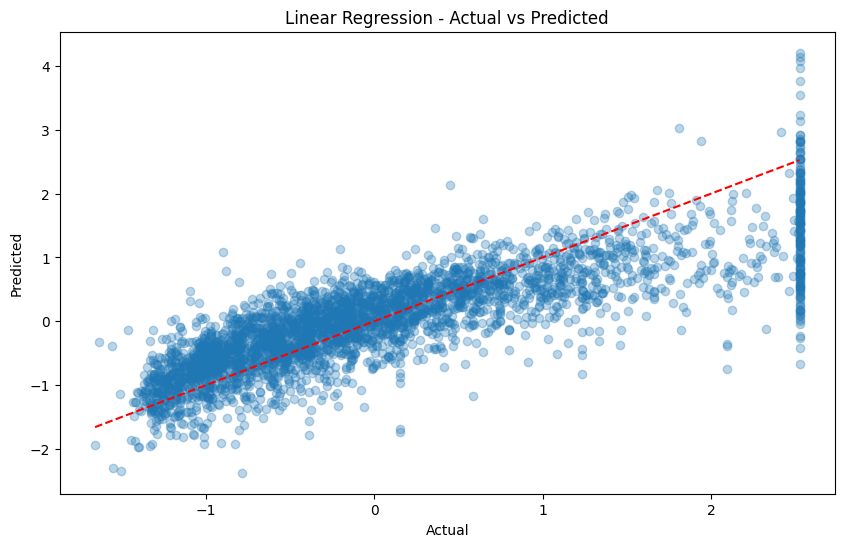

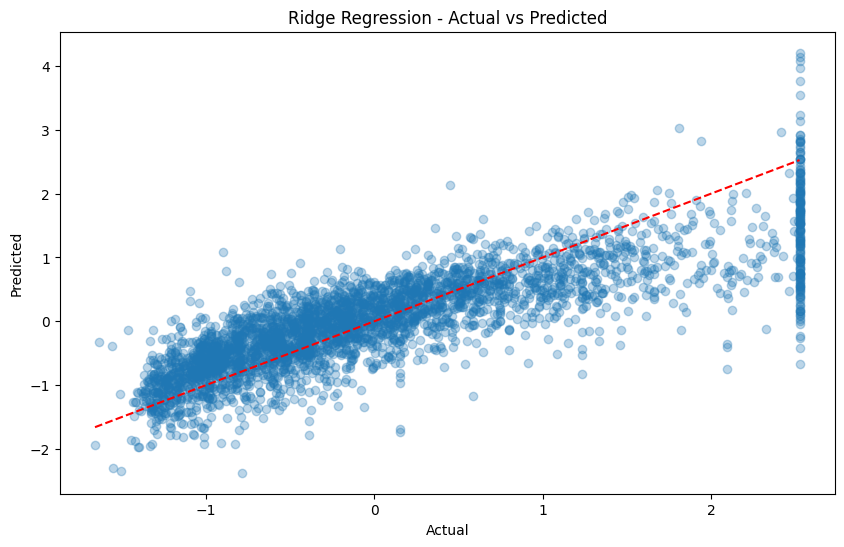

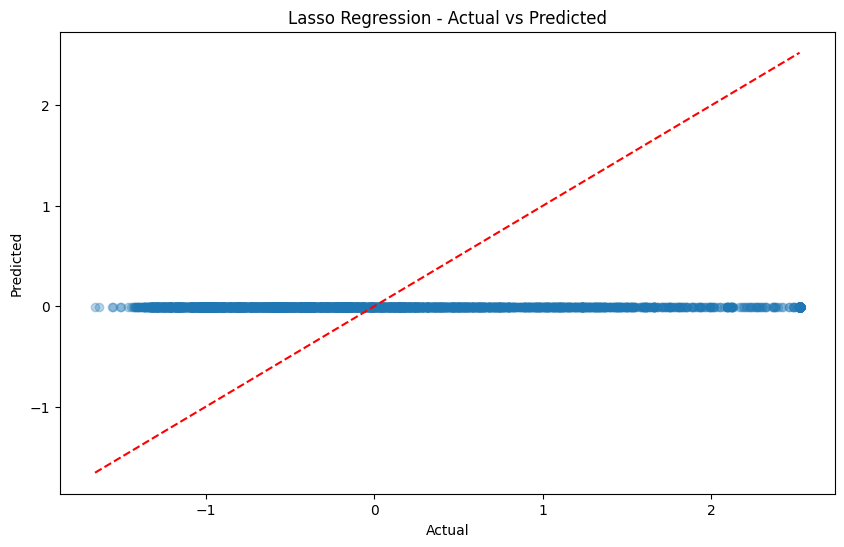

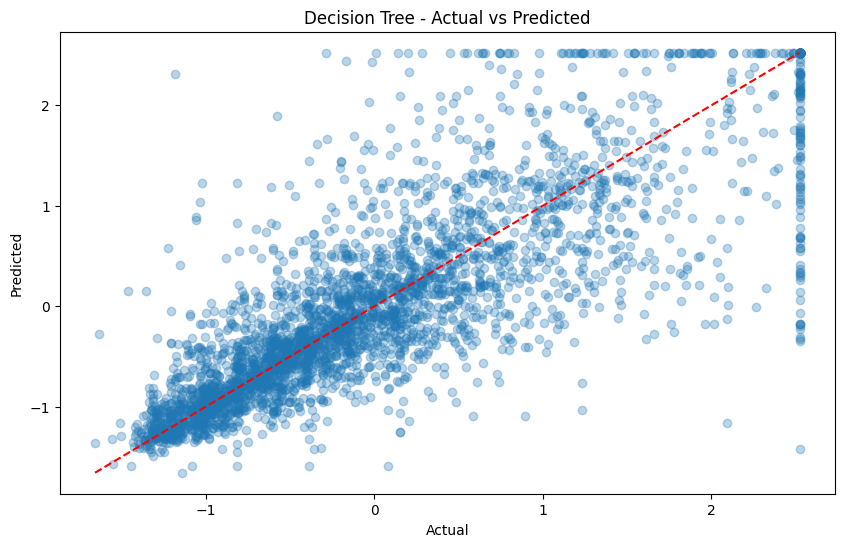

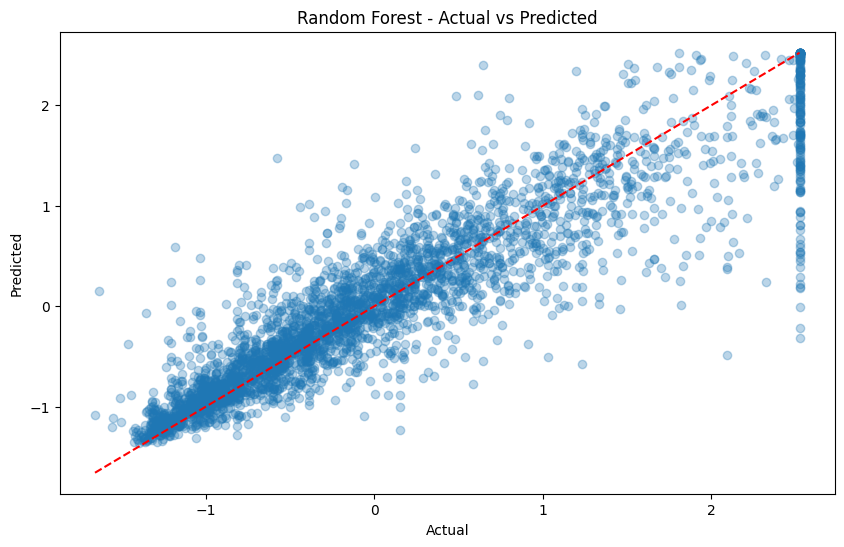

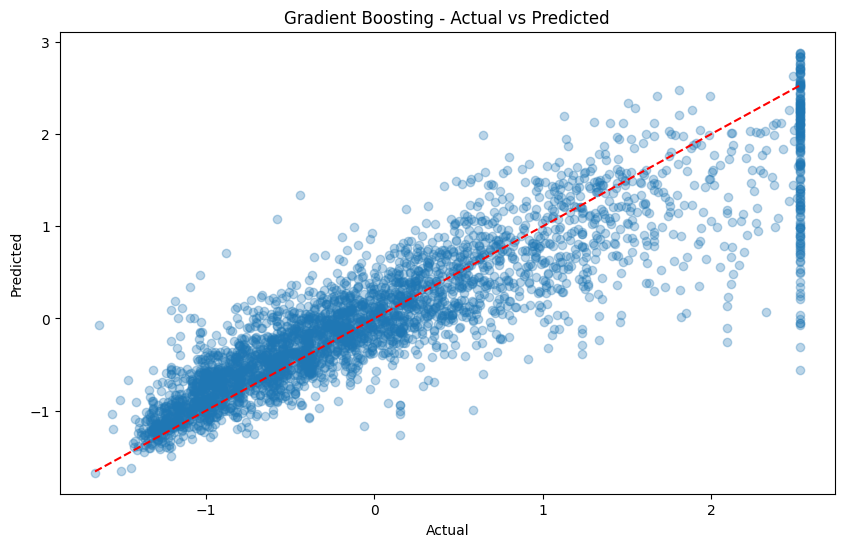

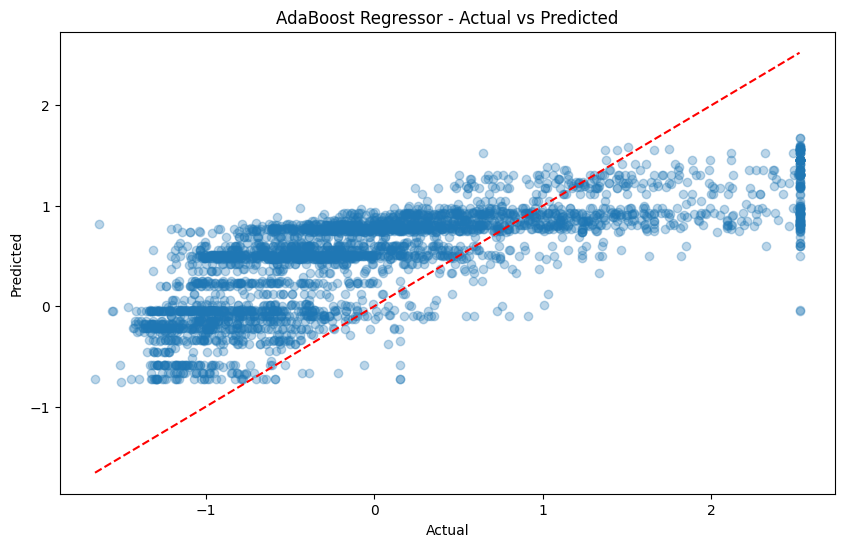

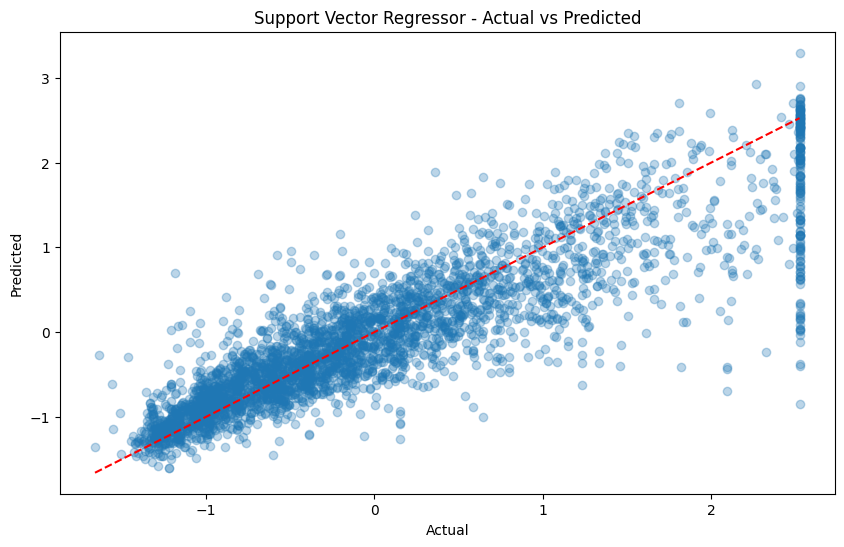

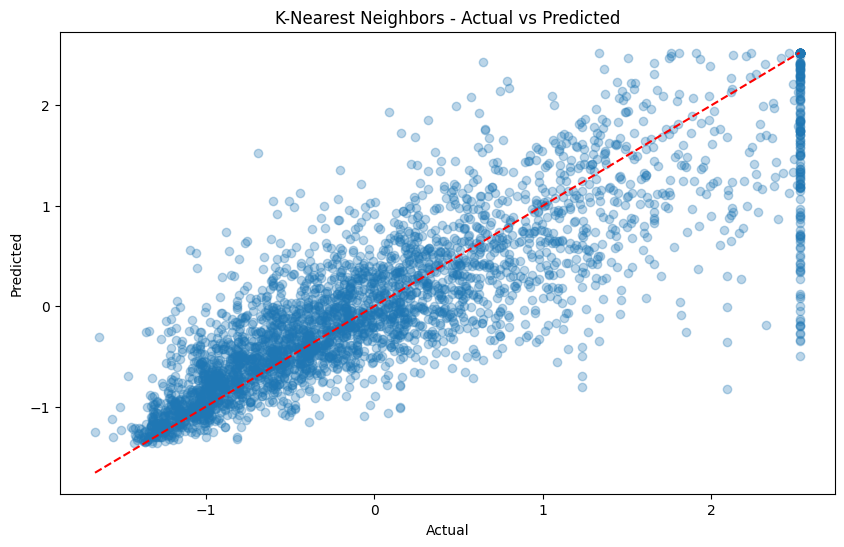

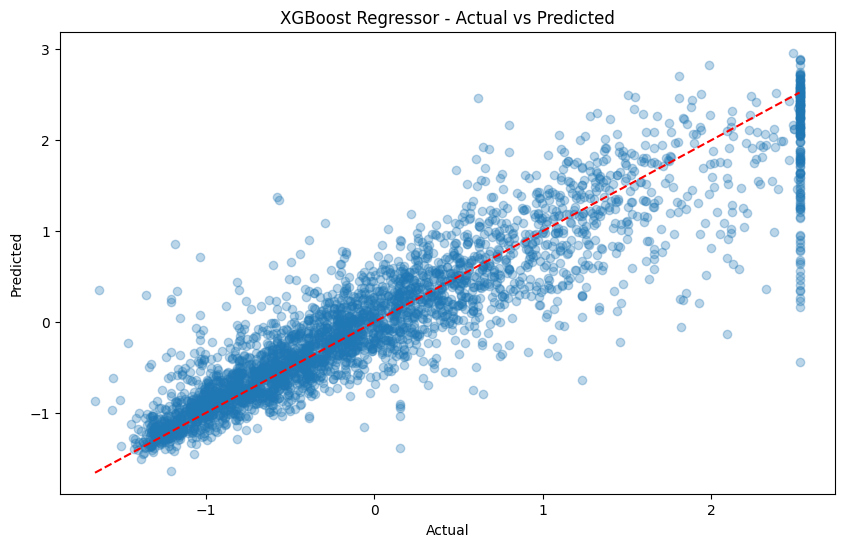

In [6]:
# Plot actual vs predicted values
for name, metrics in results.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, metrics["Predictions"], alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()


**Comparison of Models**


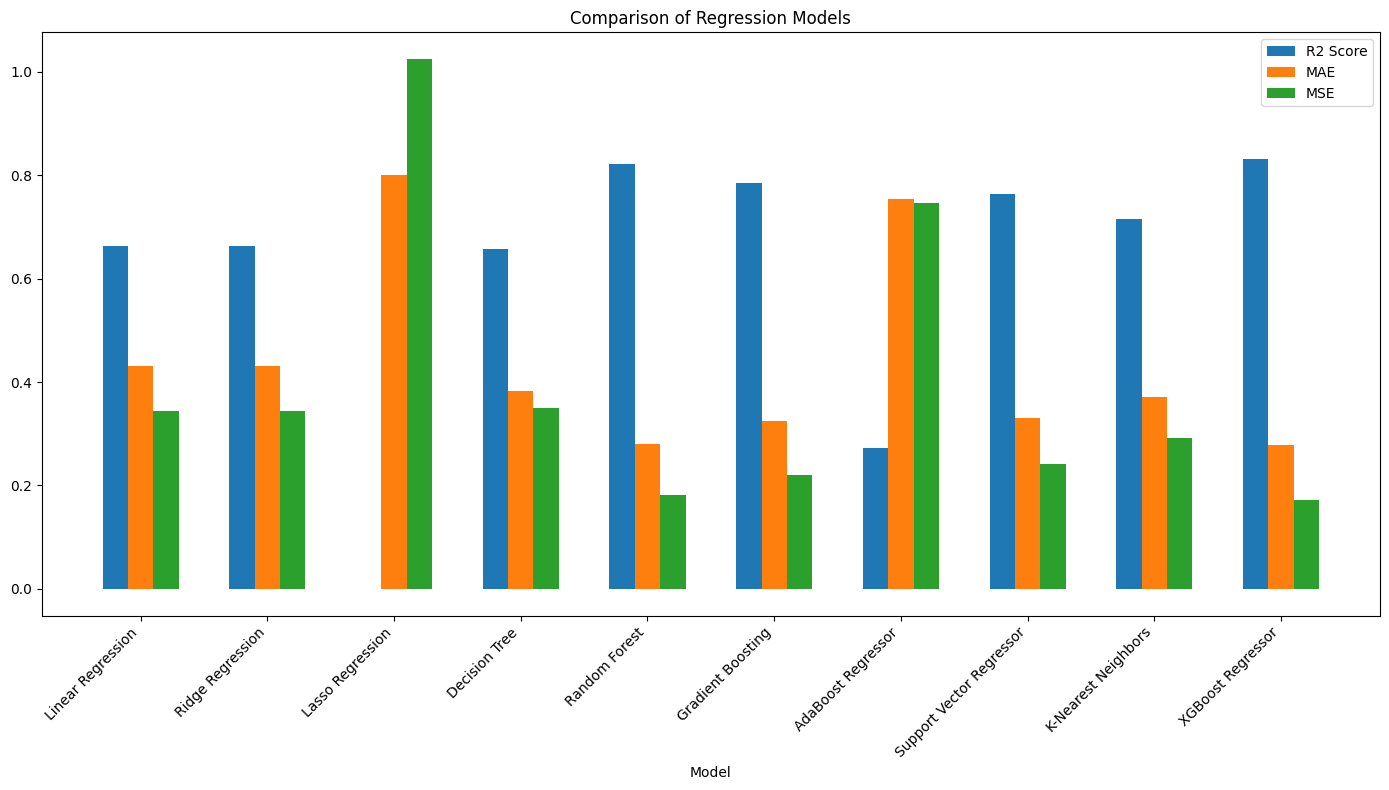

In [7]:
# Bar chart comparing different models
model_names = list(results.keys())
r2_scores = [metrics["R2 Score"] for metrics in results.values()]
maes = [metrics["MAE"] for metrics in results.values()]
mses = [metrics["MSE"] for metrics in results.values()]

x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, r2_scores, width, label='R2 Score')
rects2 = ax.bar(x, maes, width, label='MAE')
rects3 = ax.bar(x + width, mses, width, label='MSE')

ax.set_xlabel('Model')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()


**Clustering and PCA Visualization**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


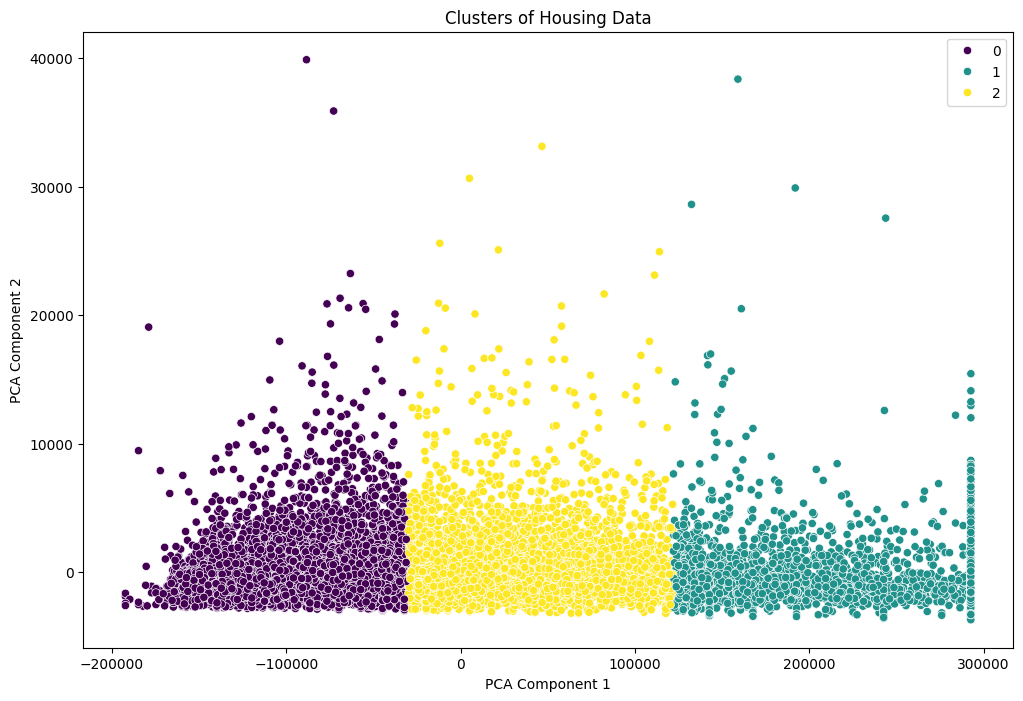

In [8]:
# Clustering according to the target variable
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Adding the cluster labels to the dataframe
data['Cluster'] = cluster_labels

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clusters of Housing Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
